In [1]:
library(tidyverse)
library(autognet)
library(arrow)
library(igraph)
library(Matrix)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.1”
── Attaching core tidyverse packages ───────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘igraph’


The following objects are masked from ‘package:lubridate’:

    %--%, union


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, 

In [2]:
source('autognet_functions.R')

In [3]:
datO.feature <- read_feather(
    paste0('data/feature_', formatC(0, flag=0, width=3),'.feather')
)
datO.network <- read_feather('data/network.feather')

In [4]:
datO.feature$T.new1 = 1
datO.feature$T.new2 = 0

In [5]:
datO.feature

X1,X2,X3,W1,W2,W3,p,T,m,Y,T.new1,T.new2
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
0,1,1,-0.25,0.25,-0.25,0.5000000,1,0.62245933,0,1,0
0,0,1,0.25,-0.25,-0.25,0.2227001,1,0.90465054,1,1,0
1,0,0,-0.25,0.25,-0.25,0.5445246,0,0.32082130,1,1,0
0,1,1,-0.25,0.25,-0.25,0.6513549,1,0.40733340,1,1,0
1,1,1,0.25,0.25,0.25,0.5000000,1,0.62245933,1,1,0
0,1,0,-0.25,-0.25,0.25,0.7772999,1,0.22270014,1,1,0
0,1,0,-0.25,-0.25,0.25,0.5000000,0,0.37754067,1,1,0
1,1,1,0.25,0.25,0.25,0.6026853,1,0.47917871,0,1,0
0,0,1,0.25,-0.25,-0.25,0.7772999,0,0.09534946,0,1,0


In [6]:
n_node = dim(datO.feature)[1]

In [7]:
G = graph.data.frame(datO.network[c(2,1)], vertices=1:n_node)

In [8]:
adjmat <- as.matrix(Matrix(as.matrix(G), sparse = FALSE))
weights <- pmax(apply(adjmat,1,sum), 1)
# weights <- rep(1,1000)

In [9]:
n_sim = 40
d_alpha = 15
d_beta = 10

In [10]:
#STEP 1. INITIALIZE LOOP 
alpha.est <- matrix(NA,n_sim,d_alpha)
beta.est <- matrix(NA,n_sim,d_beta)

In [11]:
#STEP 2. LOOP OVER ALL DATASETS
for (i_sim in 1:n_sim){
    
  #STEP 2A. SETUP DATASET S
  data.i = as.matrix(read_feather(
    paste0('data/feature_', formatC(i_sim-1, flag=0, width=3),'.feather')
  ))
  cov1.i <- (data.i[,4] + 0.25) * 2 ; cov2.i <- (data.i[,5] + 0.25) * 2 ; cov3.i <- (data.i[,6] + 0.25) * 2
  trt.i <- data.i[,8]
  outcome.i <- data.i[,10]
  
  cov1.n <-  (adjmat%*%cov1.i)/weights ; cov2.n <-  (adjmat%*%cov2.i)/weights ; cov3.n <-  (adjmat%*%cov3.i)/weights
  trt.n <- (adjmat%*%trt.i)/weights
  outcome.n <- (adjmat%*%outcome.i)/weights
  
  #STEP 2B. COVARIATE MODEL
  ## fit
  fit.cov <- optim(par=runif(d_alpha,-1,1),cov.pl,gr=NULL,covariate=cbind(cov1.i,cov2.i,cov3.i),covariate.n=cbind(cov1.n,cov2.n,cov3.n),hessian=TRUE,method='BFGS')
  
  ##estimates
  alpha.est[i_sim,] <-  fit.cov$par
  
  #STEP 2C. OUTCOME MODEL
  ##fit
  fit.outcome <- glm(outcome.i ~ trt.i + trt.n + cov1.i + cov1.n + cov2.i + cov2.n + cov3.i + cov3.n + outcome.n,family=binomial(link='logit'))
  
  ##estimates
  beta.est[i_sim,] <- fit.outcome$coefficients
  
}

In [12]:
result.df <- data.frame(Yhat1 = numeric(0), Yhat2 = numeric(0))

In [15]:
for (i_sim in 10:n_sim){
    iter_time = Sys.time()

    #Input values 
    alpha <- alpha.est[i_sim,]    
    beta <- beta.est[i_sim,]
    
    group_lengths <- c(1,1,1)
    group_functions <- c(1,1,1)
    
    pr_trt <- 1
    
    ## Make object for AGC pkg 
    beta.new <- beta[c(1,2,4,6,8,10,3,5,7,9)] #reorder because of coding function output
    alpha.new <- alpha[c(1:9,11,10,12,14,15,13)] #reorder because of coding function output
    
    outlist.point <- list(t(as.matrix(alpha.new)),t(as.matrix(beta.new)),
                    NA,NA,NA,
                    group_lengths,group_functions,adjmat)
    names(outlist.point) <- c("alpha", "beta", "NA", "NA", "NA", "group_lengths", "group_functions", "adjmat")
    class(outlist.point) <- append(class(outlist.point),"agcParamClass")
    
    ## Run AGC package 
    R <- 100
    burnin_R <- 20
    
    point.estimate <- agcEffect(outlist.point, burnin = 0, thin = 1, treatment_allocation = pr_trt, subset = 0,
                                R = R, burnin_R = burnin_R, burnin_cov = 0, average = TRUE, index_override = 0,
                                return_effects = 0)
    
    ## Save values 
    result.df[i_sim,] <- c(point.estimate[1], point.estimate[2])
    
    message(
        paste0("iteration ", i_sim, ", elapsed time: ", 
               difftime(Sys.time(), iter_time, units="secs")[[1]], " secs.")
    )
}

iteration 10, elapsed time: 3015.5387070179 secs.

iteration 11, elapsed time: 3034.962859869 secs.

iteration 12, elapsed time: 3237.84867501259 secs.

iteration 13, elapsed time: 3377.56249809265 secs.

iteration 14, elapsed time: 3363.79924297333 secs.

iteration 15, elapsed time: 3415.83976483345 secs.

iteration 16, elapsed time: 9685.31172609329 secs.

iteration 17, elapsed time: 3733.04768300056 secs.

iteration 18, elapsed time: 3348.3140399456 secs.

iteration 19, elapsed time: 8273.07642698288 secs.

iteration 20, elapsed time: 5430.65133309364 secs.

iteration 21, elapsed time: 3724.25723290443 secs.

iteration 22, elapsed time: 3685.23657202721 secs.

iteration 23, elapsed time: 3631.07333707809 secs.

iteration 24, elapsed time: 3550.77222013474 secs.

iteration 25, elapsed time: 3644.98558998108 secs.

iteration 26, elapsed time: 3511.09582185745 secs.

iteration 27, elapsed time: 3494.81435084343 secs.

iteration 28, elapsed time: 3352.0286719799 secs.

iteration 29, ela

In [25]:
write_feather(result.df, 'result_autognet.feather')

In [17]:
result.df <- read_feather('result_autognet.feather')

In [18]:
df_1 <- data.frame(Yhat = result.df$Yhat1)
df_2 <- data.frame(Yhat = result.df$Yhat2)

In [19]:
df_1$Anew <- '1'
df_2$Anew <- '0'

In [20]:
df <- rbind(df_1, df_2)

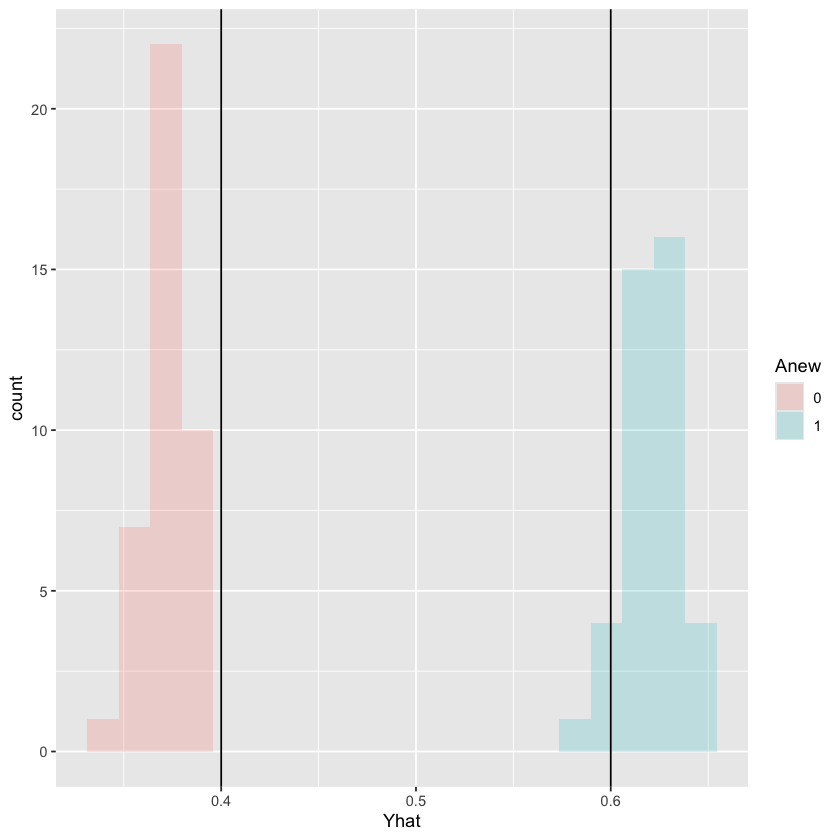

In [21]:
ggplot(df, aes(Yhat, fill = Anew)) + 
    geom_histogram(position='identity', alpha = 0.2, bins=20) +
    geom_vline(xintercept=0.4) +
    geom_vline(xintercept=0.6)

In [22]:
result.df$Ydiff = result.df$Yhat1 - result.df$Yhat2

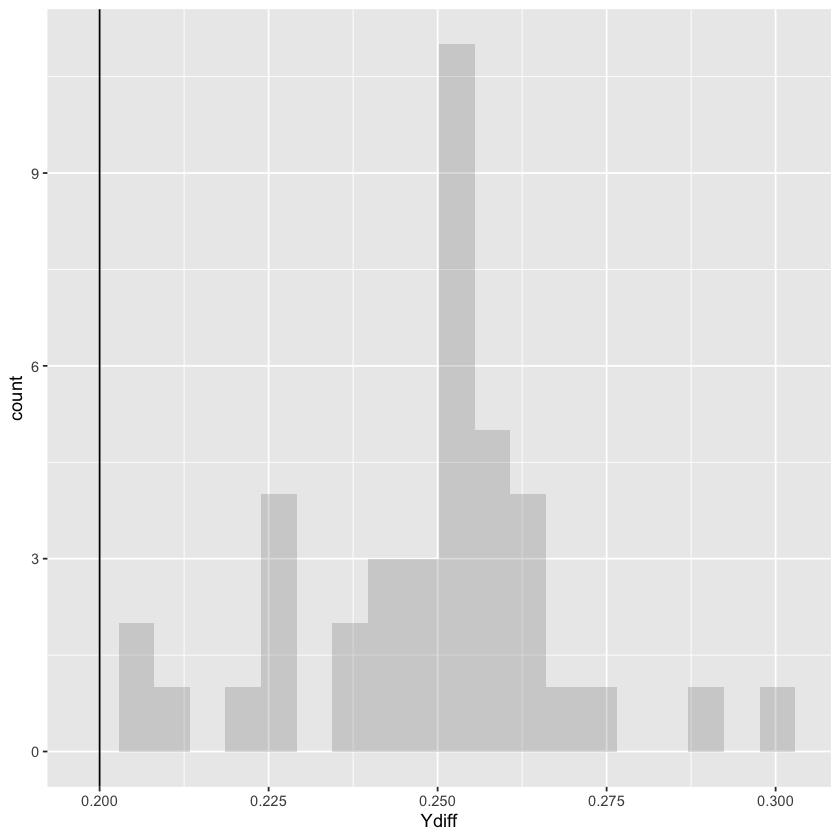

In [23]:
ggplot(result.df, aes(Ydiff)) + 
    geom_histogram(position='identity', alpha = 0.2, bins=20) +
    geom_vline(xintercept=0.2)

In [24]:
mean((result.df$Ydiff - 0.1645)**2)

[1] 0.007615018